In [1]:
#goal is to collect some demographic information using the patient class 

# functions and classes

In [2]:
#this contains the information for a patient class
#creates a class for patients so we can call information about them easily
class patient:
    def __init__(self, filepath, input_fileName, lengthPtID):
        ptID = input_fileName[:lengthPtID]
        self.ptID = ptID
        self.fileName = input_fileName
        #find the demographics in one of two sheets
        # directory = os.getcwd()
        file_adds = filepath + '/' + input_fileName
        file = pd.ExcelFile(file_adds)
        sheet_Names = file.sheet_names
        if 'Cancer_Registery Data' in sheet_Names:
            #do the thing for getting patient info
            df = pd.read_excel(input_fileName, sheet_name= 'Cancer_Registery Data')
            self.ptDemographics = df
            self.amyloid_status = df.at[0,"Amyloid Status"]
            self.survival = df.at[0,"Survival Time (Months)"]
            self.ageDx = df.at[0,"Age At Diagnosis"] 
            self.sex = df.at[0,"Gender Cancer Registry"]
            self.vitalStatus = df.at[0, "Vital Status Cancer Registry"]
            self.dx = df.at[0, "Histology"]

        elif '30 Cerner Patients ' in sheet_Names:
            #do the thing for getting patient info
            df = pd.read_excel(input_fileName, sheet_name= '30 Cerner Patients ')
            self.ptDemographics = df
            self.amyloid_status = df.at[0,"Amyloid Status"]
            self.survival = df.at[0,"Survival Time (months)"]
            self.ageDx = df.at[0,"Age At Diagnosis"] 
            self.sex = df.at[0,"Gender Cerner"]
            self.vitalStatus = df.at[0, "Vital Status (Cerner)"]
            self.dx = df.at[0, "Primary Site"]


        else: print("no patient identifying information")

        #now iterate through the list of sheets to import the patient data 
        if 'Labs' in sheet_Names:
            self.labsData = pd.read_excel(input_fileName, sheet_name= 'Labs')
        else: self.labsData = False
        
        if 'amyloid in subject' in sheet_Names:
            self.echoData = pd.read_excel(input_fileName, sheet_name= 'amyloid in subject')
        else: self.echoData = False

        if 'ChemoTx' in sheet_Names:
            self.ChemoTx = pd.read_excel(input_fileName, sheet_name= 'ChemoTx')
        else: self.ChemoTx = False

        if 'Hematologic Tx' in sheet_Names:
            self.HemeTx = pd.read_excel(input_fileName, sheet_name= 'Hematologic Tx')
        else: self.HemeTx = False

        if 'Immuno Tx' in sheet_Names:
            self.HemeTx = pd.read_excel(input_fileName, sheet_name= 'Immuno Tx')
        else: self.ImmunoTx = False

        if 'Radiation Tx' in sheet_Names:
            self.RadTx = pd.read_excel(input_fileName, sheet_name= 'Radiation Tx')
        else: self.ImmunoTx = False

        if 'Physican_Notes' in sheet_Names:
            self.MDnotes = pd.read_excel(input_fileName, sheet_name= 'Physican_Notes')
        else: self.MDnotes = False

        #to create a callable list of treatments recieved for which we have data
        tx_sheets = ['ChemoTx', 'Hematologic Tx', 'Immuno Tx']
        treatmentTypesRecieved = []

        for possible in tx_sheets:
        
            if possible in sheet_Names:
                treatmentTypesRecieved.append(possible)
        self.txRecieved = treatmentTypesRecieved

In [3]:
def FilterList(list, keyWords_primary, keyWords_secondary = ["Empty"], omit = ["Empty"]):
    #store the filtered result
    filteredList = []

    if keyWords_secondary == ["Empty"]:
        for c in list: #loop the columns
            for buzz in keyWords_primary: #loop the key words
                if buzz in c: #if the column contains the key word
                    filteredList.append(c) #add the column to the list
                    break #do not continue testing primary key words for this column
    
    else: 
        for c in list: #loop the columns
            for buzz in keyWords_primary: #loop the key words
                if buzz in c: #if the column contains the key word
                    for secondary in keyWords_secondary:
                        if secondary in c:
                            filteredList.append(c) #add the column to the list
                            break #has been added to list based on passing the seondary 
                        else:
                            pass
                    break #do not continue to check primary key words for this column
                else:
                    pass
                
    if omit != ["Empty"]: 
        for x in omit: 
            for a in filteredList:
                if x in a:
                    filteredList.remove(a)
    
    #by iterating through the column names first, we keep the order of the columns

    return filteredList 


In [4]:
#createBinary function
def createBinary(df, listOfLabs, timeColumn): 
    #list of labs needs to match exactly.  
    # Filter the dataframe before inputting
    #for boolean
    df_toBool = df[listOfLabs]
    df_bool = df_toBool.notna()
    df_asint = df_bool.astype(int)
    #add column back for time 
    df_asint.insert(0, timeColumn, df[timeColumn])
    return df_asint

def createBinarySum(df, listOfLabs, timeColumn, defaxis):
    #list of labs needs to match exactly.  
    # Filter the dataframe before inputting
    #for boolean
    df_toBool = df[listOfLabs]
    df_bool = df_toBool.notna()
    df_asint = df_bool.astype(int)
    #add column back for time 
    # df_asint.insert(0, timeColumn, df[timeColumn])
    #sum across the row
    #defaxis = 0 means the columns are preserved 
    #defaxis =1 means the rows are preserved
    df_new_sum = df_asint.sum(axis = defaxis)
    return df_new_sum

In [5]:
#get list of patients from directory 
def GetListOfPatientsFromDirectory (directory, fileExtension, fileCommon, lengthID):
    #get the directory 
    listFileNames = os.listdir(directory)
    outputList = []
    #loop through list of fileNames: 
    for file in listFileNames:
        #id if the file is patient data
        if fileCommon in file and file.endswith(fileExtension):
            #trim the file name to the pt ID
            ptID = file[:lengthID]
            outputList.append(ptID)
    return outputList

In [6]:
#alternate version of getting list of patients from a single file
#function to create a list of IDs 
#depricated
def listofIDs(start_frame, *column, length_from_start):
    if isinstance(column, str):
        all_IDs = start_frame[column] #pulls list of IDS including lab collection id
    else:
        all_IDs = start_frame
    ptIDs = [] #for storage of unique IDs

    length = int(length_from_start)

    i = 0
    for ID in all_IDs:
        if len(ID) > length_from_start:
            trimmed = ID[:length] #trims to the first 4 characters
            #if the first ID, add to the list
            if i == 0: 
                ptIDs.append(trimmed)
            #if not the first ID, and not equal to previous ID
            if i != 0 and trimmed != ptIDs[-1]: 
                ptIDs.append(trimmed)
        i= i+1 

    return ptIDs

In [7]:
def GetListofPTfiles(directory, fileExtension, fileCommon):
    listFileNames = os.listdir(directory)
    outListFiles = []
    #loop through file names
    for file in listFileNames:
        if fileCommon in file and file.endswith(fileExtension):
            outListFiles.append(file)
    return outListFiles

In [8]:
def getNormalValue(filteredDataColumn, skipValue = 6666):
    test = filteredDataColumn
    #input is a series
    
    for entry in test:
        if entry != skipValue:
            outputValue = entry
                # print("this is output: ", outputValue)
                #set x to True
            break
        else:
            # print("entry is blank")
            pass
    return outputValue

In [9]:
#get amyloid status dictionary inputs, sort ptIDs to lists based on amyloid status 
def getListSortedByAmyloid(amyloidDictionary, listPositive, listNegative, listOther,
                           statusPositive = "yes", statusNegative = "no"):
    for pt in amyloidDictionary.keys():
        status = amyloidDictionary[pt]
        if status == statusPositive:
            listPositive.append(pt)
        elif status == statusNegative:
            listNegative.append(pt)
        else:
            listOther.append(pt)
    #does not check for double listed patient IDs

In [10]:
#function for masking a dataframe 
def patientSectionOfFrame(start_frame, column_toMask, ptID):
    #ptID is a row parameter in the column_toMask
    df_use = start_frame #copy of the frame

    #first check if sheet has the column of interest
    data_top = list(start_frame.columns) #returns the headers as a list

    #determine of the sheet contains the column of interest
    if data_top.count(column_toMask) > 0: 
        #if true, now find if the patient is present
        searchForPt = start_frame[column_toMask].str.startswith(ptID).sum() #returns the number of instances of the patient
        if searchForPt > 0:
            #patient is present 
            #mask the data for the patient
            df_clean = df_use.dropna(subset= [column_toMask]) #removing NA 
            mask = df_clean[column_toMask].str.startswith(ptID) #masking for the rows where the patient has data
            df_sub_tosave = df_clean[mask] #output dataframe filtered for the patient
            return df_sub_tosave
        else:
            #the patient isn't present
            # return print("The patient " + ptID + " is not in " + sheet_name)
            pass
    else:
        #the column of interest isn't present
        # return print("The column " + column_toMask + " is not in the sheet " + sheet_name)
        pass



In [11]:
def outputToExcel(df_data, fileName_header, fileName_Common, fileName_suffix,
                  parent_dir, folderName, sheetName):
    fileName = fileName_header + fileName_Common + fileName_suffix
    outfile_extension = '.xlsx'
    outfile_boxplts = fileName + outfile_extension
    path_out= os.path.join(parent_dir, folderName, outfile_boxplts)

    if os.path.exists(path_out):
            #if old sheet
            with pd.ExcelWriter(path_out, mode = 'a', if_sheet_exists = 'overlay') as writer:
                    df_data.to_excel(writer, sheet_name = sheetName, index = True)
    else: 
            #new sheet
            with pd.ExcelWriter(path_out) as writer:
                    df_data.to_excel(writer, sheet_name = sheetName, index = True) #if new sheet
    
def outputFiguresPath(fileName_header, fileName_mid, fileName_suff, parent_dir, folderName):
        fileName_header = str(fileName_header)
        fileName_mid = str(fileName_mid)
        fileName_suff = str(fileName_suff)

        #cleaning the input to prevent addition of / to the directory
        fileName_header = fileName_header.replace("/", "-")
        fileName_mid = fileName_mid.replace("/", "-")
        fileName_suff = fileName_suff.replace("/", "-")

        fileName = fileName_header + fileName_mid +fileName_suff
        out_filename = fileName + '.tif'
        new_filepath = os.path.join(parent_dir, folderName, out_filename)
        #the output path can be used to save the figure
        return new_filepath
        # plt.savefig(new_filepath, bbox_inches = 'tight')

def makeFolderPathForData(parent_dir, folderName_header, folderName_common, folderName_suffix):
    #makes a new directory for your files
    #returns the folder name for use in other functions
    folderName = folderName_header + folderName_common + folderName_suffix
    path = os.path.join(parent_dir,folderName)
    if not os.path.exists(path):
        os.mkdir(path)
    return folderName

# libraries and dirrectories 

In [12]:
#libraries and dirrectory 
# import missingno as msno
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.patches as mpatches
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error, r2_score
# from scipy.optimize import curve_fit


In [13]:
#location of original data
# starting_directory = os.getcwd()

# new_dirrectory = 'C:/Users/maega/Documents/3000 PhD/3300_BEAT Labs/Projects/Cardiac-Amyloidosis-Multiple-Myeloma/012 Processed Data/data-2024-06-05'
# os.chdir(new_dirrectory)

## directory navigation and file naming

In [14]:
#updates to directory management
# machine_directory = 'C:\Users\mcremer' # the C and path to the project folder
machine_directory = 'C:/Users/maega' #when working from home machine
storage_directory = 'UFL Dropbox/Maegan Cremer/research-share/Maegan/Projects' #Local, HPG, or dropbox
project_directory = 'Cardiac-Amyloidosis-Multiple-Myeloma' #project folder
project_lv2_directory = '012 Processed Data/data-2024-06-05' #deeper part of project folder

path = os.path.join(machine_directory, storage_directory, 
                    project_directory, project_lv2_directory)
os.chdir(path)
parent_dir = path
new_dirrectory = path #used for data import only


In [15]:
#folder and file out
folderNameHeader = "AL_Known_DataComplet-Freq"
folderNameCommon = "_allLabs"
folderNameSuffix = "_2024-08-05_v1"

fileNameHeader = "AL_Known_DataComplet-Freq"
fileNameCommon = "_allLabs"
fileNameSuffix = "_2024-08-05_v1"

project_lv2_directory = '012 Processed Data' #deeper part of project folder
path = os.path.join(machine_directory, storage_directory, 
                    project_directory, project_lv2_directory)
parent_dir = path

folder_data_out = makeFolderPathForData(parent_dir=parent_dir, folderName_header=folderNameHeader,
                                        folderName_common=folderNameCommon, folderName_suffix=folderNameSuffix)
# outputToExcel(*, fileName_header=fileNameHeader, fileName_Common= fileNameCommon, 
#               fileName_suffix= fileNameSuffix, folderName = folder_data_out, sheetName= *)

# fig_file_out = outputFiguresPath(fileName_header=fileNameHeader, fileName_mid=**, 
#                                  fileName_suff= fileNameSuffix, parent_dir=parent_dir, folderName=folder_data_out)

# importing patient data


In [16]:
#importing patient data as dictionaries of dataframes
# ptID_test = "E-01"

#build a dictionary of patients and their values 
ptFiles = GetListofPTfiles(new_dirrectory, '.xlsx', 'data')

patientDictAmyloid = {}
patientDictSurvival = {}
patientDictLabs = {}
patientDictEcho = {}
patientDictNotes = {}
patientDictDx = {}
patientDictVitalStatus = {}
patientDictSex = {}
patientDictAge = {}

#loop through the listOfPatients 
for file in ptFiles: 
    pt = patient(new_dirrectory, file, 4)
    patientDictAmyloid[pt.ptID] = pt.amyloid_status
    patientDictSurvival[pt.ptID] = pt.survival
    patientDictLabs[pt.ptID] = pt.labsData
    patientDictEcho[pt.ptID] = pt.echoData
    patientDictNotes[pt.ptID] = pt.MDnotes
    patientDictDx[pt.ptID] = pt.dx
    patientDictVitalStatus[pt.ptID] = pt.vitalStatus
    patientDictSex[pt.ptID] = pt.sex
    patientDictAge[pt.ptID] = pt.ageDx
    

#calling patient to test 
# ptLabsTest = patientDictLabs[ptID_test]

In [17]:
EchoTimeColumn ='time from diagnosis to first echo (months)'
echoDates = {}
for pt in patientDictEcho:
    ptEchoData = patientDictEcho[pt]
    patientEchoDate = ptEchoData[EchoTimeColumn]
    if 'none' not in list(patientEchoDate):
        echoDates[pt] = patientEchoDate

## amyloid sorting

In [53]:
#list of patients by amyloid status 

listPositive = []
listNegative = []
listOther = []

getListSortedByAmyloid(patientDictAmyloid, listPositive= listPositive,
                       listNegative=listNegative, listOther=listOther)

In [19]:
#create list of amyloid status known patients
AL_knownPts = listPositive + listNegative
# print(listPositive)
# print(listNegative)
# print(AL_knownPts)

## setting list of patients

In [20]:
pt_list = AL_knownPts #list of patients to use for iterators below

### encoding some demographics and saving patient list

In [56]:
# saving amyloid status list 
#encoding the amyloid status
dict_dx_codes = {
    "MGUS" : 1, 
    "MM" : 2, 
    "Multiple Myeloma" : 2,
    "MULTIPLE MYELOMA" : 2 
    #other values are going to be set to 0
}

dict_AL_codes = {
    "yes" : 2, 
    "no" : 1, 
    "unk" : 3,
}

dict_sex_codes = {
    "Male" : 0,
    "MALE": 0, 
    "Female" : 1, 
    "FEMALE" : 1,  
}

dict_of_codes = {"AL": dict_AL_codes, 
                 "Dx": dict_dx_codes, 
                 "Sex": dict_sex_codes}

dict_of_data = {"AL": patientDictAmyloid, 
                "Dx": patientDictDx, 
                "Sex": patientDictSex}

dict_encoded_pt_AL_Dx_sex = {}

for ptID in list(pt_list):
    listPtValues = []
    for key in list(dict_of_codes.keys()):
        LocalValue = ''
        for code in dict_of_codes[key]:
            if code in dict_of_data[key][ptID]:
                # print(ptID, " code: ", code)
                LocalValue = dict_of_codes[key][code] 
        if LocalValue == '': 
            listPtValues.append(0)
        else:
             listPtValues.append(LocalValue)
    # print("patient values: ", listPtValues)
    dict_encoded_pt_AL_Dx_sex[ptID] = listPtValues

df_all_encoded_AL_dx_sex = pd.DataFrame.from_dict(dict_encoded_pt_AL_Dx_sex, orient='index')

df_all_encoded_AL_dx_sex.columns = ["Amyloid Status", "Dx", "Sex"]

outputToExcel(df_all_encoded_AL_dx_sex, fileName_header=fileNameHeader, fileName_Common= fileNameCommon, parent_dir= parent_dir,
              fileName_suffix= fileNameSuffix, folderName = folder_data_out, sheetName= "encoded demographics")


## Collecting patient lab columns
pulling all lab columns which including 'Result', 'Troponin-T', and 'BNP'\
excluding columns containing 'Method'

In [21]:
#dictionary for the filtered data
#this enables filtering of the patient data as its own block of code
dictOfFilteredLabs = {}
dictOfNormalRanges = {}

#other input values to set outside of loop 
x_column_name = "RelTime(Days)"

In [22]:
#dictionary for the filtered data and the list of columnNames
#this enables filtering of the patient data as its own block of code
dictOfFilteredLabs = {}

#other input values to set outside of loop 
x_column_name = "RelTime(Days)"
#creating dictionaries for all patients in the dirrectory 

#also collects the column names of interest 

for ptID in pt_list:
    #to collect and filter the patient labs into a dictionary
    df_Labs = patientDictLabs[ptID]

    orig_columns = df_Labs.columns

    #filter the patient labs
    columnNames = FilterList(orig_columns, keyWords_primary = ['Result', 'Troponin-T', 'BNP'],  
                                omit = ['Method', 'ABO', 'Dohle', "Toxic Granulation", "D Dimer Result",
                                        "Urine Color Result", "Urine Leukocyte Esterase Result",
                                        "Urine Nitrite Result", "Urinalysis Squamous Epithelial Cells Result (/hpf)",
                                        "(/hpf)", "Hep B", "Hep B Surf Ag Result", "Hep C", "Hep C Ab Screen Result",
                                        "Hypersegmentation Result", "HCG Result (Serum)", "Coombs Test Result",
                                        "HIV Result"])
    # columnNames = FilterList(orig_columns, keyWords_primary = columnsToUse,
    #                          omit = ['Method', 'ABO', 'Dohle', "Toxic Granulation", "D Dimer Result",
    #                                     "Urine Color Result", "Urine Leukocyte Esterase Result",
    #                                     "Urine Nitrite Result", "Urinalysis Squamous Epithelial Cells Result (/hpf)",
    #                                     "(/hpf)", "Hep B", "Hep B Surf Ag Result", "Hep C", "Hep C Ab Screen Result",
    #                                     "Hypersegmentation Result", "HCG Result (Serum)", "Coombs Test Result",
    #                                     "HIV Result", "Urine Glucose Result(mg/dL)"])
    
    
    testNames = [x_column_name]
    testNames.extend(columnNames) #addition of time label


    ptLabs_results= df_Labs[testNames] #new data frame of just results

    #troponin contains strings which mess up plotting 
    df_Labs_results_2 = ptLabs_results
    # for col in columnNames:
    #     df_Labs_results_2[col] = ptLabs_results[col].apply(lambda x: 0 if isinstance(x, str) else x)
    df_Labs_results_2["Troponin-T"] = ptLabs_results["Troponin-T"].apply(lambda x: 0 if isinstance(x, str) else x)
    df_Labs_results_2["NT Pro BNP (B-Type Natriuretic Peptide)"] = ptLabs_results["NT Pro BNP (B-Type Natriuretic Peptide)"].apply(lambda x: 0 if isinstance(x, str) else x)
    df_Labs_results_2['Anisocytosis Result'] = df_Labs_results_2['Anisocytosis Result'].replace({'1+': 1, '2+': 2,'3+': 3})
    df_Labs_results_2['Macrocytes Result'] = df_Labs_results_2['Macrocytes Result'].replace({'1+': 1, '2+': 2,'3+': 3})

    ptLabs_results_2 = df_Labs_results_2
    dictOfFilteredLabs[ptID] = ptLabs_results_2


C:\Users\maega\AppData\Local\Temp\ipykernel_23484\3998295302.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Labs_results_2["Troponin-T"] = ptLabs_results["Troponin-T"].apply(lambda x: 0 if isinstance(x, str) else x)
C:\Users\maega\AppData\Local\Temp\ipykernel_23484\3998295302.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Labs_results_2["NT Pro BNP (B-Type Natriuretic Peptide)"] = ptLabs_results["NT Pro BNP (B-Type Natriuretic Peptide)"].apply(lambda x: 0 if isinstance(x, str) else x)
C:\U

In [23]:
# #creating dictionaries for all patients in the dirrectory 
# for ptID_test in (patientDictLabs.keys()):
#     #to collect and filter the patient labs into a dictionary
#     df_Labs = patientDictLabs[ptID_test]

#     orig_columns = df_Labs.columns

#     #filter the patient labs
#     columnNames = FilterList(orig_columns, keyWords_primary = ['Result', 'Troponin-T', 'BNP'],  
#                                 omit = ['Method'])
    
#     testNames = [x_column_name]
#     testNames.extend(columnNames) #addition of time label


#     ptLabs_results= df_Labs[testNames] #new data frame of just results

#     #troponin contains strings which mess up plotting 
#     df_Labs_results_2 = ptLabs_results
#     for col in columnNames:
#         df_Labs_results_2[col] = ptLabs_results[col].apply(lambda x: 0 if isinstance(x, str) else x)
#     ptLabs_results_2 = df_Labs_results_2
#     dictOfFilteredLabs[ptID_test] = ptLabs_results_2



In [24]:
#saving the list of column names 
df_columnNames = pd.DataFrame(columnNames)
# sub_dir = "C:/Users/maega/Documents/3000 PhD/3300_BEAT Labs/Projects/Cardiac-Amyloidosis-Multiple-Myeloma/012 Processed Data"
# folderNameout = "PtLabsFiltered_2024-06-26_v1"
# dateTag = "-20240626"
# outputToExcel(df_columnNames, fileName_header="ColNames", fileName_Common="-resultCols", fileName_suffix=dateTag,
#               parent_dir=sub_dir, folderName=folderNameout, sheetName= "all data")

In [25]:
outputToExcel(df_columnNames, fileName_header=fileNameHeader, fileName_Common= fileNameCommon, parent_dir= parent_dir,
              fileName_suffix= fileNameSuffix, folderName = folder_data_out, sheetName= "column names")

## Creating and saving a dataframe of all patient labs
using the filtered list of columns generated above 

In [26]:
#usinig the filtered labs dictionary, create a new dataframe consisting of only the patients of a particular amyloid status
#create the dataframe
columnsForNewDataframe = ["ptID", x_column_name]
columnsForNewDataframe = columnsForNewDataframe.append(columnNames)
df_allLabsFiltered = pd.DataFrame(columns = columnsForNewDataframe)


for pt in pt_list: 
    labsforpt = dictOfFilteredLabs[pt]

    #generate a list of length = len(x_column_name) containing only the ptID
    ptIDlabel_list = []
    i=0
    while i < len(labsforpt[x_column_name]):
        ptIDlabel_list.append(pt)
        i = i+1

    labsforpt_2 = labsforpt.assign(ptID = ptIDlabel_list)

    df_allLabsFiltered = df_allLabsFiltered._append(labsforpt_2, ignore_index = True)



In [27]:
# #save this output some where for yourself 
# sub_dir = "C:/Users/maega/Documents/3000 PhD/3300_BEAT Labs/Projects/Cardiac-Amyloidosis-Multiple-Myeloma/012 Processed Data"
# folderNameout = "PtLabsFiltered_2024-06-26_v1"
# dateTag = "-20240626"
# outputToExcel(df_allLabsFiltered, fileName_header="AllLabs-AllPt", fileName_Common="-filtered", fileName_suffix=dateTag,
#               parent_dir=sub_dir, folderName=folderNameout, sheetName= "all data")



In [28]:
outputToExcel(df_allLabsFiltered, fileName_header=fileNameHeader, fileName_Common= fileNameCommon, parent_dir=parent_dir,
              fileName_suffix= fileNameSuffix, folderName = folder_data_out, sheetName= "allPt lab data")

## Characterizing the frequency of data collected in each lab column
columns are then sorted by frequency

In [29]:
#get binary sum of the data to see which are the most common labs 
df_binarySum = createBinarySum(df_allLabsFiltered, listOfLabs=columnNames, timeColumn= x_column_name, defaxis=0)
df_sorted_binary = df_binarySum.sort_values(axis = 0, ascending=False)
df_sorted_binary.columns = ["total number of labs collected"]



#save this output somewhere for later
# sub_dir = "C:/Users/maega/Documents/3000 PhD/3300_BEAT Labs/Projects/Cardiac-Amyloidosis-Multiple-Myeloma/012 Processed Data"
# folderNameout = "PtLabsFiltered_2024-06-26_v1"
# dateTag = "-20240626"
# outputToExcel(df_sorted_binary, fileName_header="AllLabs", fileName_Common="-Frequency", fileName_suffix=dateTag,
#               parent_dir=sub_dir, folderName=folderNameout, sheetName= "Frequency")

outputToExcel(df_sorted_binary, fileName_header=fileNameHeader, fileName_Common= fileNameCommon, parent_dir=parent_dir,
              fileName_suffix= fileNameSuffix, folderName = folder_data_out, sheetName= "lab frequency")



sorted_columnNames = list(df_sorted_binary.index)

slices_sorted = [sorted_columnNames[i:i + 26] for i in range(0, len(sorted_columnNames), 26)] 
#26 is the number of labs you want to show in one figure at a time
#there are 140 total labs when you filter for all labs

In [30]:
# #concatination of dataframes 
# pd.concat([df_numbPtWLab, df_sorted_binary, numbLabsPerLabPerPt_desc.T, df_NumbLabsPerLabPerPt.T ])

# Completeness of Data by Number of Patients

In [31]:
sorted_columnNames = list(df_sorted_binary.index)

len_columnNames = len(sorted_columnNames)

# slices_sorted = [sorted_columnNames[i:len_columnNames] for i in range(0, len(sorted_columnNames), 26)]

### numb pts with lab and list of patients which do and don't have lab

In [32]:
#question is if all patients have values for a particular column 
#for a column, cycle through patients, determine if patient has lab 
dictNumbPtWLab = {}
dictPtsWOLab = {}
dictPtsWLab = {}

for column in sorted_columnNames: 
    listPtIDsWOData = []
    listPtIDWData = []
    totalPtsWLabs = 0
    for ptID in pt_list:
        ptDataAll = dictOfFilteredLabs[ptID]
        #check to see if there is data in the column
        ptDataForColumn = createBinarySum(ptDataAll, listOfLabs=column, timeColumn=x_column_name,
                                          defaxis=0)
        if ptDataForColumn == 0: 
            #add ptID to list
            listPtIDsWOData.extend([ptID])
        if ptDataForColumn > 0: 
            listPtIDWData.extend([ptID])
            totalPtsWLabs = totalPtsWLabs + 1
    dictNumbPtWLab[column] = totalPtsWLabs
    dictPtsWLab[column] = listPtIDWData
    dictPtsWOLab[column] = listPtIDsWOData

#saving the data 
df_numbPtWLab = pd.DataFrame.from_dict(dictNumbPtWLab, orient = 'index')
df_numbPtWLab.columns = ["Number of Patients with this lab"]
df_PtsWLab = pd.DataFrame.from_dict(dictPtsWLab, orient = 'index')
df_PtsWOLab = pd.DataFrame.from_dict(dictPtsWOLab, orient = 'index')

# sub_dir = "C:/Users/maega/Documents/3000 PhD/3300_BEAT Labs/Projects/Cardiac-Amyloidosis-Multiple-Myeloma/012 Processed Data"
# folderNameout = "PtLabsFiltered_2024-06-26_v1"
# dateTag = "-20240626"
# outputToExcel(df_numbPtWLab, fileName_header="ListPts", fileName_Common="-W-WO-Lab", fileName_suffix=dateTag,
#               parent_dir=sub_dir, folderName=folderNameout, sheetName= "numberPts")
# outputToExcel(df_PtsWLab, fileName_header="ListPts", fileName_Common="-W-WO-Lab", fileName_suffix=dateTag,
#               parent_dir=sub_dir, folderName=folderNameout, sheetName= "lab list pts with")
# outputToExcel(df_PtsWOLab, fileName_header="ListPts", fileName_Common="-W-WO-Lab", fileName_suffix=dateTag,
#               parent_dir=sub_dir, folderName=folderNameout, sheetName= "lab list pts without")
    
outputToExcel(df_numbPtWLab, fileName_header=fileNameHeader, fileName_Common= fileNameCommon, parent_dir=parent_dir,
              fileName_suffix= fileNameSuffix, folderName = folder_data_out, sheetName= "NumbPt w Lab")
outputToExcel(df_PtsWLab, fileName_header=fileNameHeader, fileName_Common= fileNameCommon, parent_dir=parent_dir,
              fileName_suffix= fileNameSuffix, folderName = folder_data_out, sheetName= "list pts with lab")
outputToExcel(df_PtsWOLab, fileName_header=fileNameHeader, fileName_Common= fileNameCommon, parent_dir=parent_dir,
              fileName_suffix= fileNameSuffix, folderName = folder_data_out, sheetName= "list pts without lab")

### how many labs a pt has

In [33]:
#describing how many labs a patient has
dictNumbLabsPerPatient = {}
for ptID in pt_list:
    #get patient data 
    ptDataAll = dictOfFilteredLabs[ptID]
    #check to see if there is data in columns
    ptDataBinary = createBinarySum(ptDataAll, listOfLabs=sorted_columnNames, timeColumn=x_column_name,
                                        defaxis=0)
    #sum the data such that you know the total numebr of labs the patient has
    sumBinary = sum(ptDataBinary)
    #get the total number of labs (columns) that the patient has records for
    LabsCollected = ptDataBinary.loc[ptDataBinary[sorted_columnNames] > 0].astype(bool).astype(int)
    totalLabsForPatient = sum(LabsCollected)
    dictNumbLabsPerPatient[ptID] = totalLabsForPatient

df_NumbLabsPerPatient = pd.DataFrame.from_dict(dictNumbLabsPerPatient, orient = 'index')
# df_NumbLabsPerPatient.columns = ['total number of labs collected']

outputToExcel(df_NumbLabsPerPatient, fileName_header=fileNameHeader, fileName_Common= fileNameCommon, parent_dir=parent_dir,
              fileName_suffix= fileNameSuffix, folderName = folder_data_out, sheetName= "list numb labs per pt")

### how many of each lab does a patient have

In [34]:
#how many of each lab does a patient have
dict_NumbLabsPerLabPerPt = {}
# for lab in sorted_columnNames:
for pt in pt_list: 
    numbLabsForPt = []
    for lab in sorted_columnNames:
    # for pt in pt_list: 
        #get the relevant patient data
        # ptData_forLab= sum(createBinarySum(dictOfFilteredLabs[pt], listOfLabs = lab, 
        #                                    timeColumn= x_column_name, defaxis=0))
        ptData_forLab= createBinarySum(dictOfFilteredLabs[pt], listOfLabs = lab, 
                                           timeColumn= x_column_name, defaxis=0)
        numbLabsForPt.append(ptData_forLab)
    dict_NumbLabsPerLabPerPt[pt] = numbLabsForPt

#make dataframe where the rows are pt ID and the columns are the data names
df_NumbLabsPerLabPerPt = pd.DataFrame.from_dict(dict_NumbLabsPerLabPerPt, orient = 'index')
df_NumbLabsPerLabPerPt.columns = sorted_columnNames

outputToExcel(df_NumbLabsPerLabPerPt, fileName_header=fileNameHeader, fileName_Common= fileNameCommon, parent_dir= parent_dir, 
              fileName_suffix= fileNameSuffix, folderName = folder_data_out, sheetName= "numb labs per lab per pt")

### avg numb lab recordings per lab

In [35]:
#find average numb lab recordings per lab 
numbLabsPerLabPerPt_desc = df_NumbLabsPerLabPerPt.describe()
# df_mode_numbLabsPerLabPerPt =df_NumbLabsPerLabPerPt.mode()

# df_desc_NumbLabsPerLabPerPt = pd.concat([numbLabsPerLabPerPt_desc, df_mode_numbLabsPerLabPerPt], axis = 0)

outputToExcel(numbLabsPerLabPerPt_desc, fileName_header=fileNameHeader, fileName_Common= fileNameCommon, parent_dir=parent_dir,
              fileName_suffix= fileNameSuffix, folderName = folder_data_out, sheetName= "numb labs per lab desc")

#can technically do some grouping by amyloid status if needed by adding the amyloid descriptor column to the dataframe.

In [36]:
#to plot the average number of instances of a lab per lab across patients in a set
# sns.boxplot(data=df_NumbLabsPerLabPerPt)


## concat dataframes for easy data import describing lab completeness across patients

In [37]:
#concatination of dataframes 
#transpose dataframes and sort 
df1 = df_numbPtWLab.sort_index()
# df_sorted_binary.columns = ["total number of labs collected"]
df2 = df_sorted_binary.sort_index()

df3 = numbLabsPerLabPerPt_desc.T.sort_index()
df4 = df_NumbLabsPerLabPerPt.T.sort_index()

# df_LabsCompleteness = pd.concat([df_numbPtWLab, df_sorted_binary, numbLabsPerLabPerPt_desc, df_NumbLabsPerLabPerPt ], axis = 0)
df_LabsCompleteness = pd.concat([df1, df2, df3, df4 ], axis = 1)
df_LabsCompleteness = df_LabsCompleteness.sort_values(by='Number of Patients with this lab', ascending = False)

In [38]:
outputToExcel(df_LabsCompleteness, fileName_header=fileNameHeader, fileName_Common= fileNameCommon, parent_dir=parent_dir,
              fileName_suffix= fileNameSuffix, folderName = folder_data_out, sheetName= "labs completeness")

In [39]:
#graphing
# import matplotlib.pyplot as plt
# numbLabsPerLabPerPt_desc.boxplot()

## how many time points a patient has

In [40]:
#describing how many time points a patient has 
dictTimePointsPerPatient = {}
for ptID in pt_list:
    #get patient data 
    ptDataAll = dictOfFilteredLabs[ptID]

    #get the relative time column 
    time_col = ptDataAll[x_column_name]

    #check the length of the time column 
    time_length = len(time_col)

    dictTimePointsPerPatient[ptID] = time_length

df_NumbTimePerPatient = pd.DataFrame.from_dict(dictTimePointsPerPatient, orient = 'index')

# sub_dir = "C:/Users/maega/Documents/3000 PhD/3300_BEAT Labs/Projects/Cardiac-Amyloidosis-Multiple-Myeloma/012 Processed Data"
# folderNameout = "PtLabsFiltered_2024-06-26_v1"
# dateTag = "-20240626"
# outputToExcel(df_NumbTimePerPatient, fileName_header="ListPts", fileName_Common="-W-WO-Lab", fileName_suffix=dateTag,
#               parent_dir=sub_dir, folderName=folderNameout, sheetName= "list of numb time points per pt")

outputToExcel(df_NumbTimePerPatient, fileName_header=fileNameHeader, fileName_Common= fileNameCommon, parent_dir=parent_dir,
              fileName_suffix= fileNameSuffix, folderName = folder_data_out, sheetName= "numb time points per pt")

# visualization of unsorted data using missingno library

In [41]:
# #using missingno
# for i, slice in enumerate(slices_sorted):
#     dataToPlot = df_allLabsFiltered[slice]
#     # fig, ax= plt.subplots()
#     msno.matrix(dataToPlot)
#     sub_dir = "C:/Users/maega/Documents/3000 PhD/3300_BEAT Labs/Projects/Cardiac-Amyloidosis-Multiple-Myeloma/012 Processed Data"
#     folderNameout = "PtLabsFiltered_2024-06-26_v1"
#     dateTag = "-20240626"
#     matrixOutPath = outputFiguresPath(fileName_header= "datafreq-", fileName_mid= i, fileName_suff="-matrix"+dateTag, 
#                       parent_dir=sub_dir, folderName=folderNameout)
#     plt.savefig(matrixOutPath, bbox_inches = 'tight')
#     fig, ax= plt.subplots()
#     msno.bar(dataToPlot, sort="descending")
#     barOutPath = outputFiguresPath(fileName_header= "datafreq-", fileName_mid= i, fileName_suff="-bar"+dateTag, 
#                     parent_dir=sub_dir, folderName=folderNameout)
#     plt.savefig(barOutPath, bbox_inches = 'tight')
#     plt.close("all")




# Visualizations using Seaborn
Visualization of data completeness using the list of column names sorted by frequency of data\
data is color mapped by patient

### colormaping for patients

In [42]:
# # Generate a color palette with a unique color for each patient
# unique_patients = df_allLabsFiltered['ptID'].unique()
# num_patients = len(unique_patients)
# palette = sns.color_palette("viridis", num_patients)
# patient_color_map = {patient: palette[i] for i, patient in enumerate(unique_patients)}

In [43]:
# Generate a color palette with a unique color for each patient
#uses the sepecified list of patients 
unique_patients = pt_list
num_patients = len(unique_patients)
palette = sns.color_palette("viridis", num_patients)
patient_color_map = {patient: palette[i] for i, patient in enumerate(unique_patients)}

In [44]:
# #for amyloid positive patients
# num_patients_positive = len(listPositive)
# palette_positive = sns.color_palette("winter", num_patients_positive)
# patient_color_map_positive = {patient: palette_positive[i] for i, patient in enumerate(listPositive)}

# #for amyloid negative patients
# num_patients_negative = len(listNegative)
# palette_negative = sns.color_palette("spring", num_patients_negative)
# patient_color_map_negative = {patient: palette_negative[i] for i, patient in enumerate(listNegative)}

# #combine the dictionaries to plot all the patients with known amyloid status
# patient_color_map = patient_color_map_negative.copy()
# patient_color_map.update(patient_color_map_positive)

In [45]:
unique_patients = pt_list
#for amyloid positive patients
num_patients_positive = len(listPositive)
palette_positive = sns.color_palette("viridis", num_patients_positive)
patient_color_map_positive = {patient: palette_positive[i] for i, patient in enumerate(listPositive)}

#for amyloid negative patients
num_patients_negative = len(listNegative)
palette_negative = sns.color_palette("plasma", num_patients_negative)
patient_color_map_negative = {patient: palette_negative[i] for i, patient in enumerate(listNegative)}

#combine the dictionaries to plot all the patients with known amyloid status
patient_color_map = patient_color_map_negative.copy()
patient_color_map.update(patient_color_map_positive)

### matrix visualizations

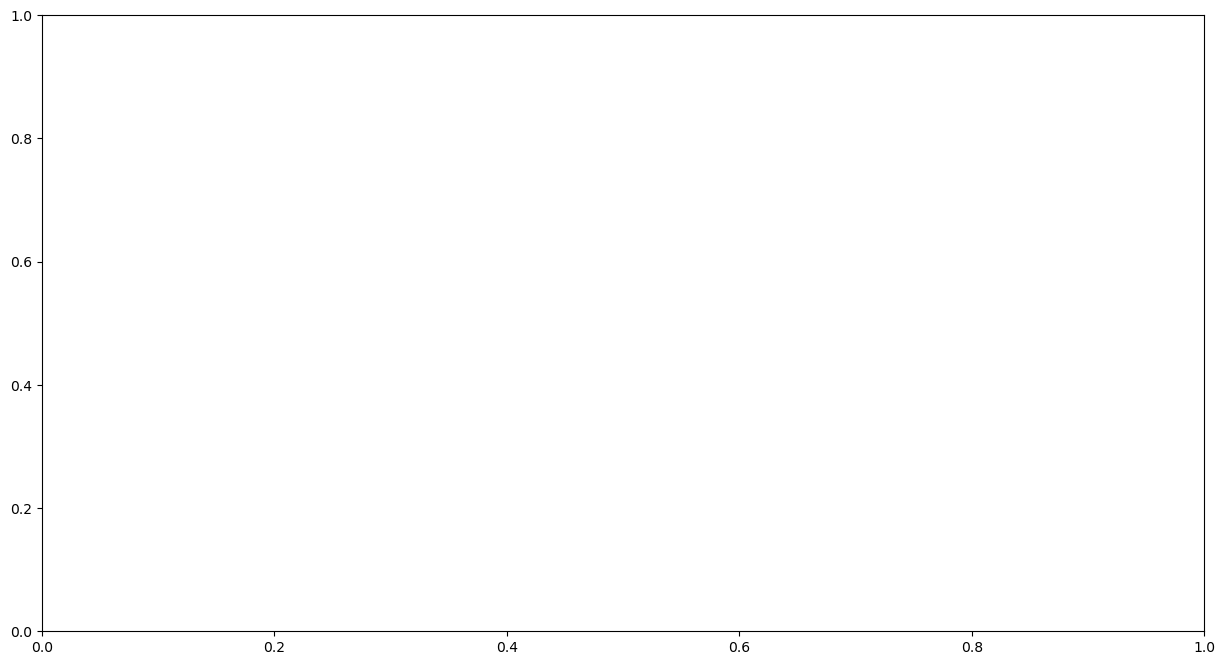

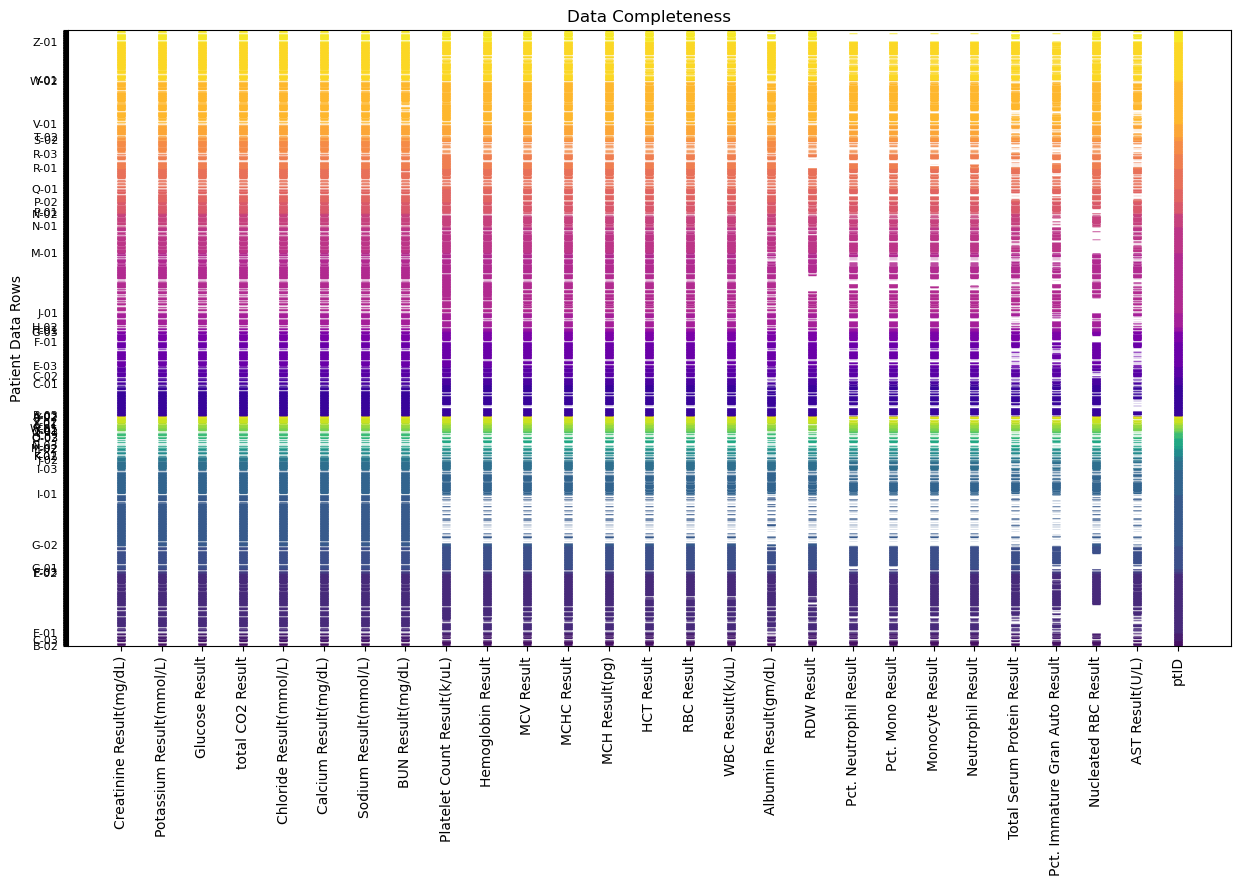

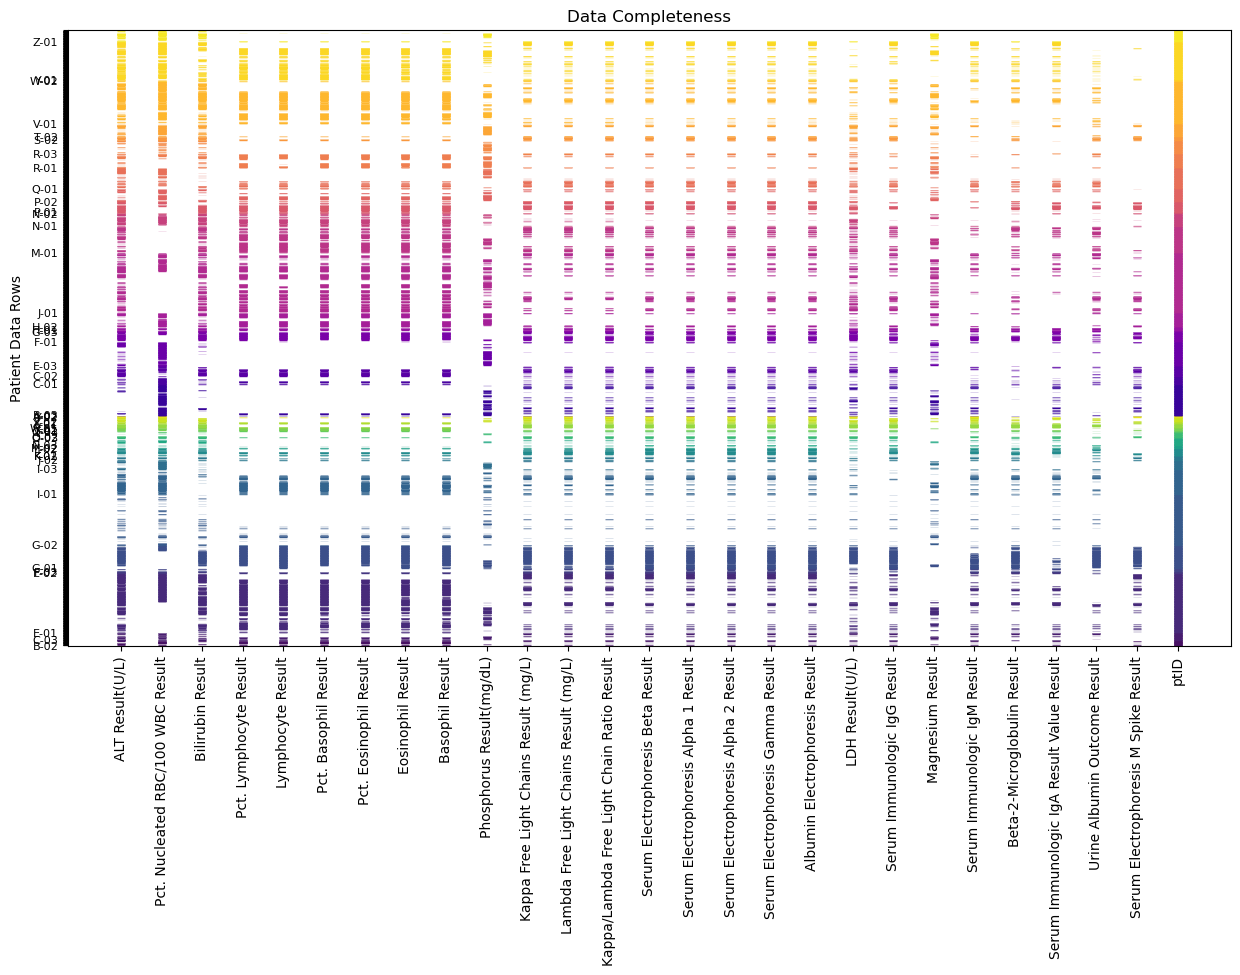

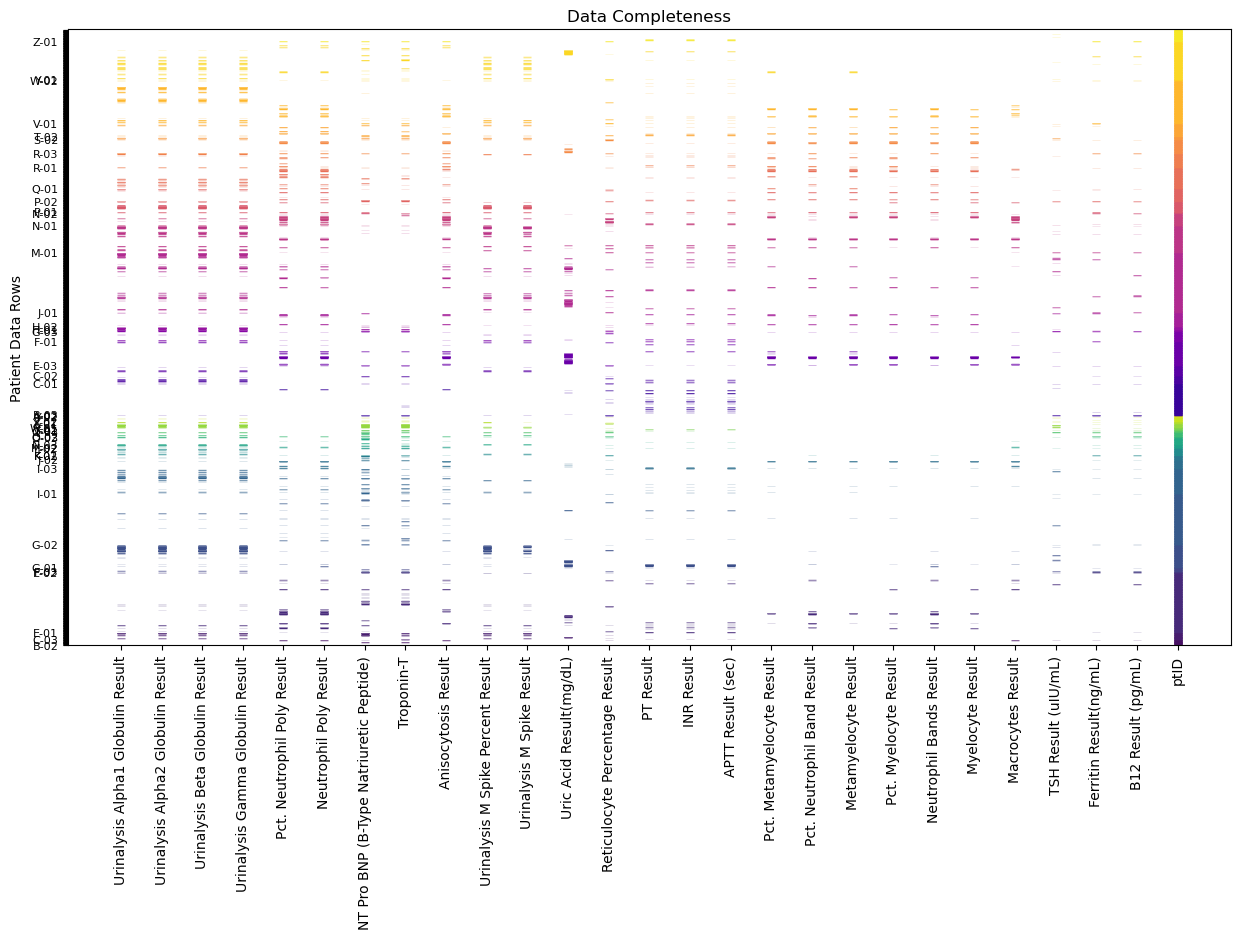

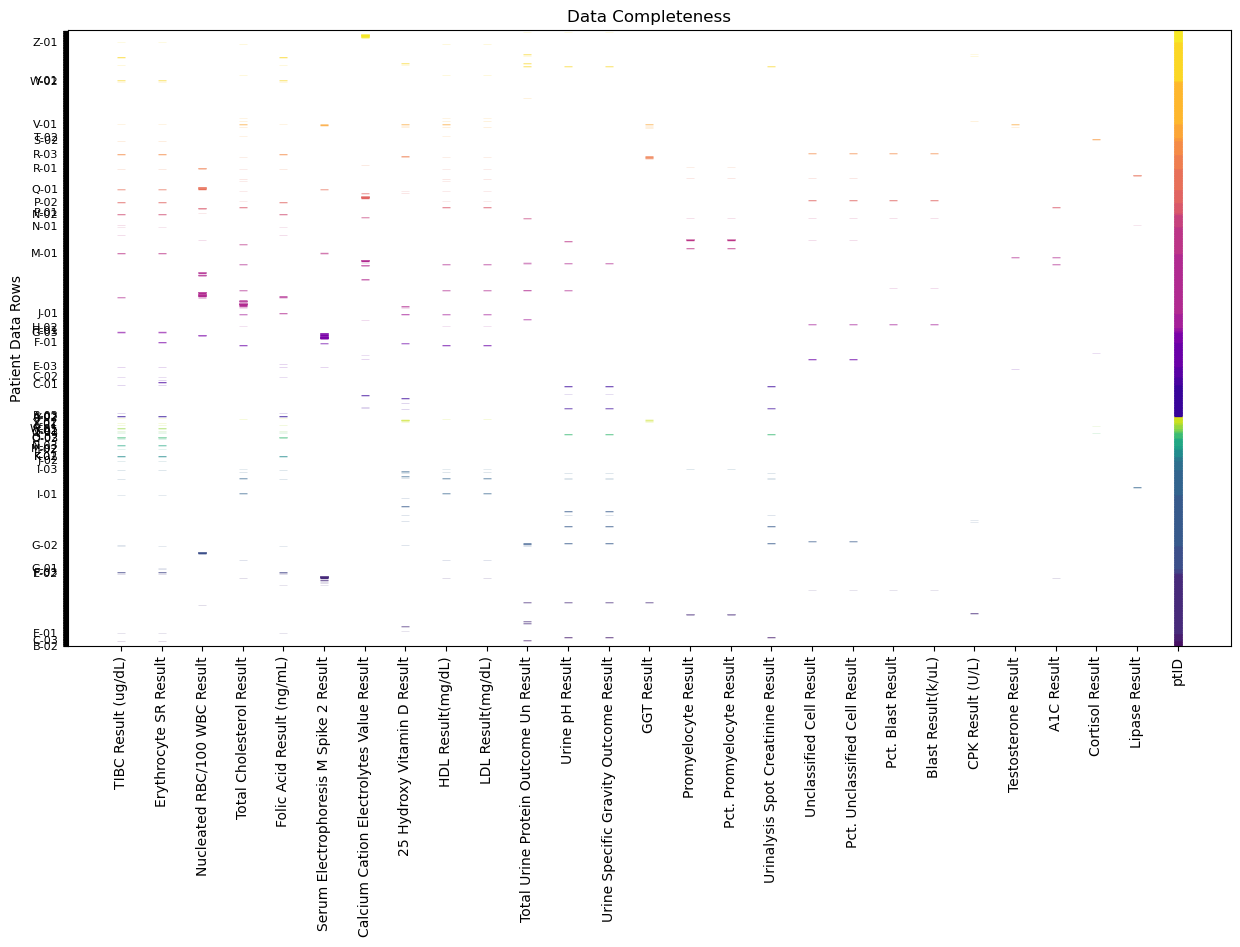

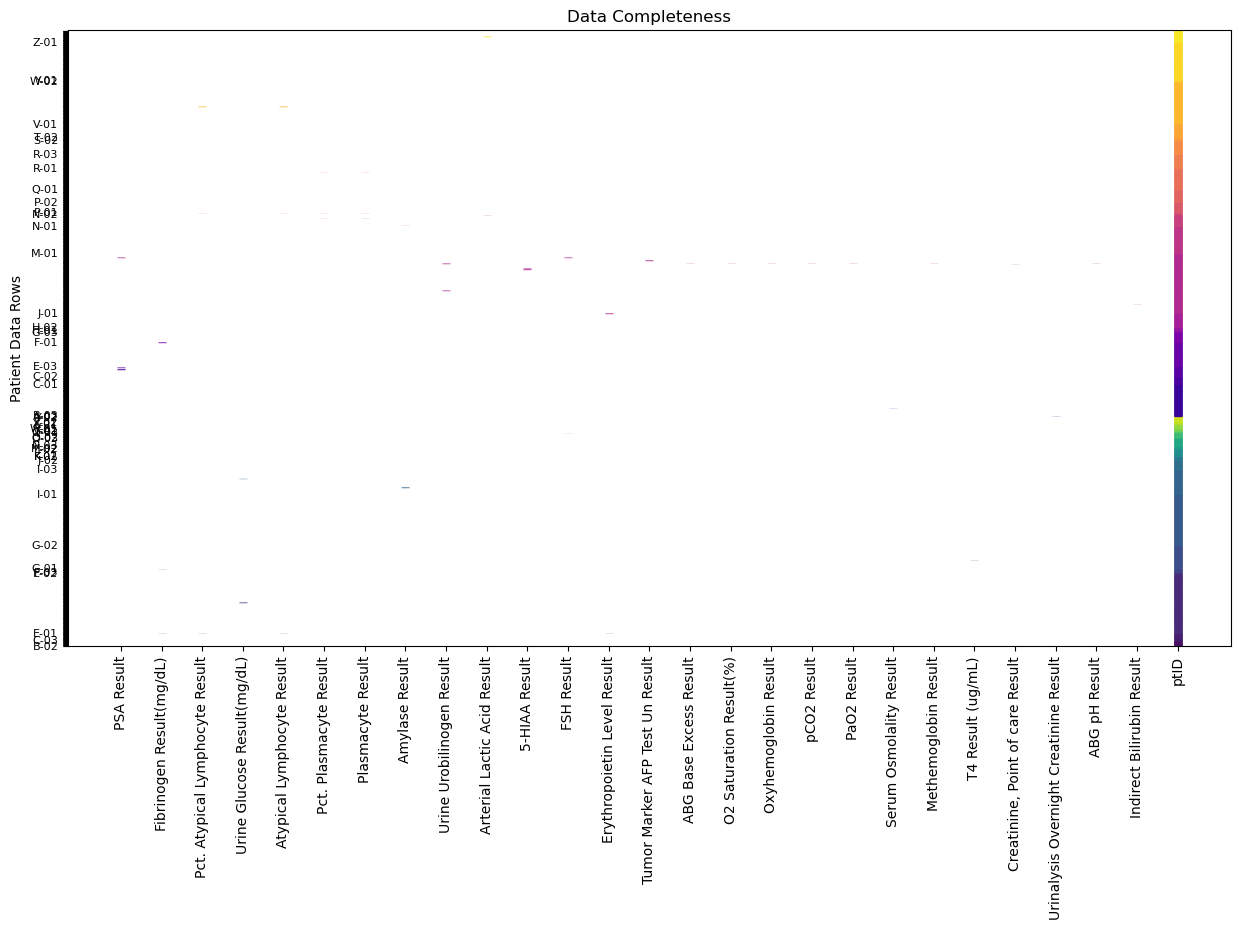

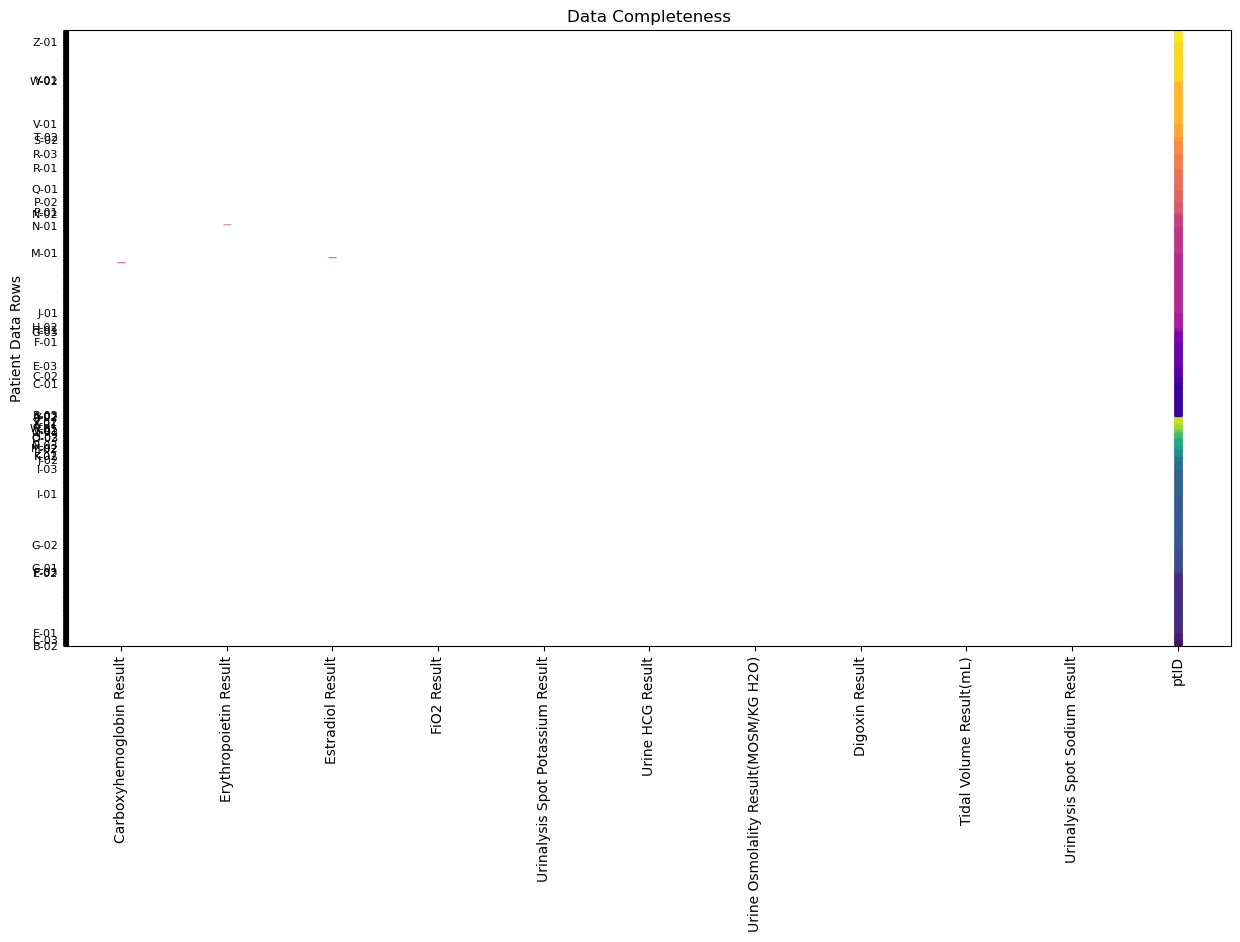

In [46]:
fig, ax = plt.subplots(figsize=(15, 8))
listLabs = []

#for matrix visualization
for numb, slice in enumerate(slices_sorted):
    listLabs = slice.copy()
    addCol = ['ptID']
    listLabs.extend(addCol)
    dataToPlot = df_allLabsFiltered[listLabs]

    # Create a DataFrame to indicate the presence (1) or absence (0) of data
    presence_matrix = dataToPlot.notnull().astype(int)

    # Plot each row of data, coloring by patient and highlighting null values
    fig, ax = plt.subplots(figsize=(15, 8))
    for idx, row in dataToPlot.iterrows():
        ptID = row['ptID']
        color = patient_color_map[ptID]
        y_values = presence_matrix.loc[idx].values
        for j, value in enumerate(y_values):
            if value == 1:
                ax.plot(j, idx, '_', color=color)
            else:
                ax.plot(j, idx, '_', color='white', markersize=10)

    # Customize the plot
    ax.set_xticks(range(len(presence_matrix.columns))) 
    ax.set_xticklabels(presence_matrix.columns, rotation = 'vertical')  
    # Create y-tick labels only for the first instance of each patient
    y_ticks = []
    y_ticklabels = []
    for i in range(len(dataToPlot)):
        if i == 0 or dataToPlot['ptID'].iloc[i] != dataToPlot['ptID'].iloc[i - 1]:
            y_ticks.append(i)
            y_ticklabels.append(dataToPlot['ptID'].iloc[i])
        else:
            y_ticks.append(i)
            y_ticklabels.append('')

    ax.set_yticks(y_ticks)
    ax.set_yticklabels(y_ticklabels, size = 8)
    # ax.set_xlabel('Lab Results')
    ax.set_ylabel('Patient Data Rows')
    ax.set_ylim([-1, len(dataToPlot)])
    # ax.legend(handles=[plt.Line2D([0], [0], marker='o', color=palette[i], label=unique_patients[i], linestyle='') 
    #                 for i in range(num_patients)], loc='upper right', bbox_to_anchor=(1.15, 1))

    ax.set_title('Data Completeness')
    # ColorMatrixOutPath = outputFiguresPath(fileName_header= "datafreq-", fileName_mid= numb, fileName_suff="-matrixColor"+dateTag, 
    #                 parent_dir=sub_dir, folderName=folderNameout)
    
    
    ColorMatrixOutPath = outputFiguresPath(fileName_header=fileNameHeader, fileName_mid="-matrixColor_" + str(numb) + "_", 
                                 fileName_suff= fileNameSuffix, parent_dir=parent_dir, folderName=folder_data_out)

    plt.savefig(ColorMatrixOutPath, bbox_inches = 'tight')

## Stacked bar graphs

C:\Users\maega\AppData\Local\Temp\ipykernel_23484\3230264289.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(listLabs, rotation = 'vertical')
C:\Users\maega\AppData\Local\Temp\ipykernel_23484\3230264289.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(listLabs, rotation = 'vertical')
C:\Users\maega\AppData\Local\Temp\ipykernel_23484\3230264289.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(listLabs, rotation = 'vertical')
C:\Users\maega\AppData\Local\Temp\ipykernel_23484\3230264289.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(listLabs, rotation = 'vertica

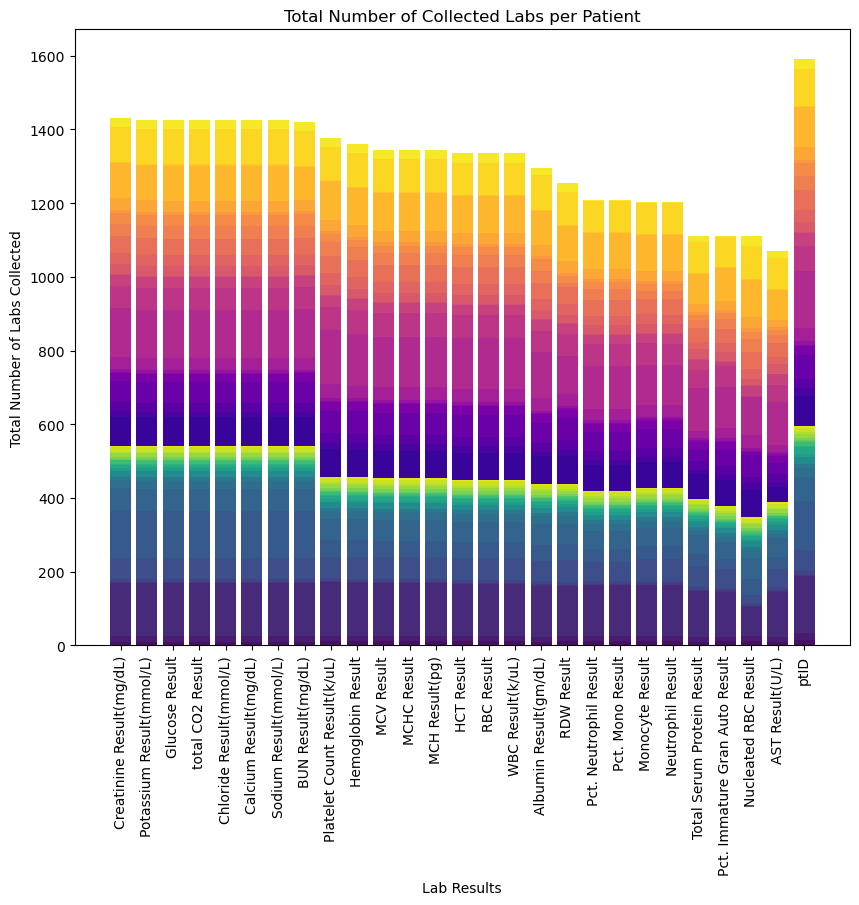

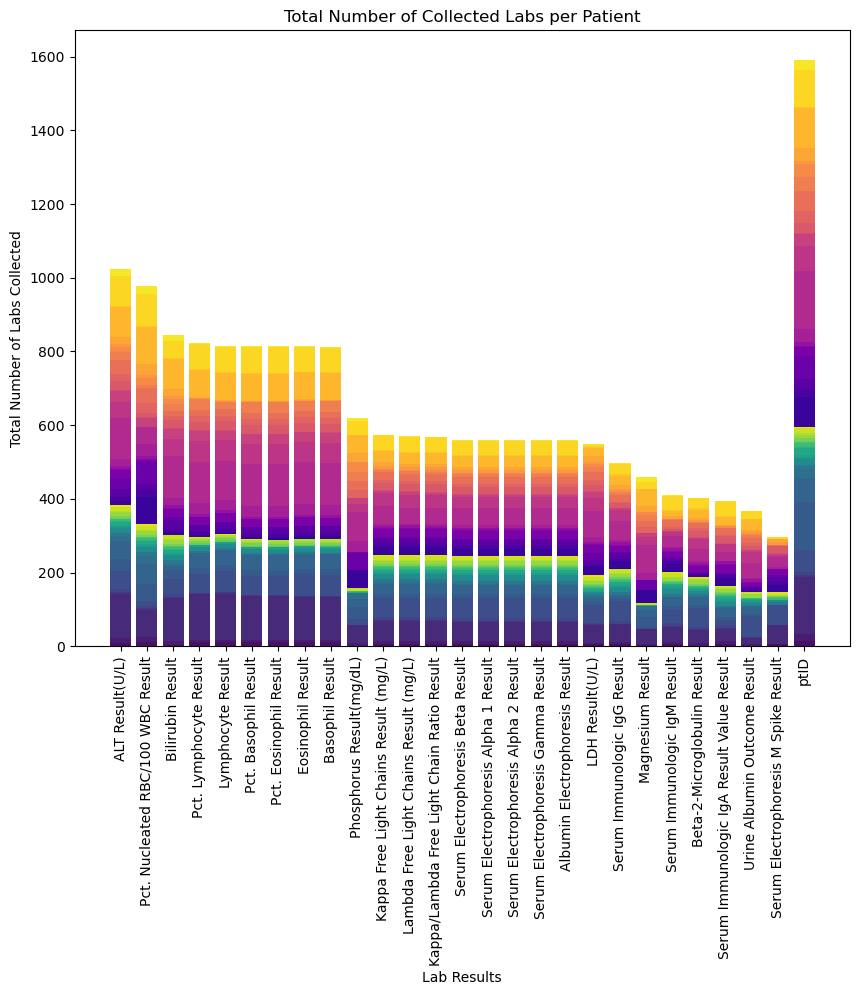

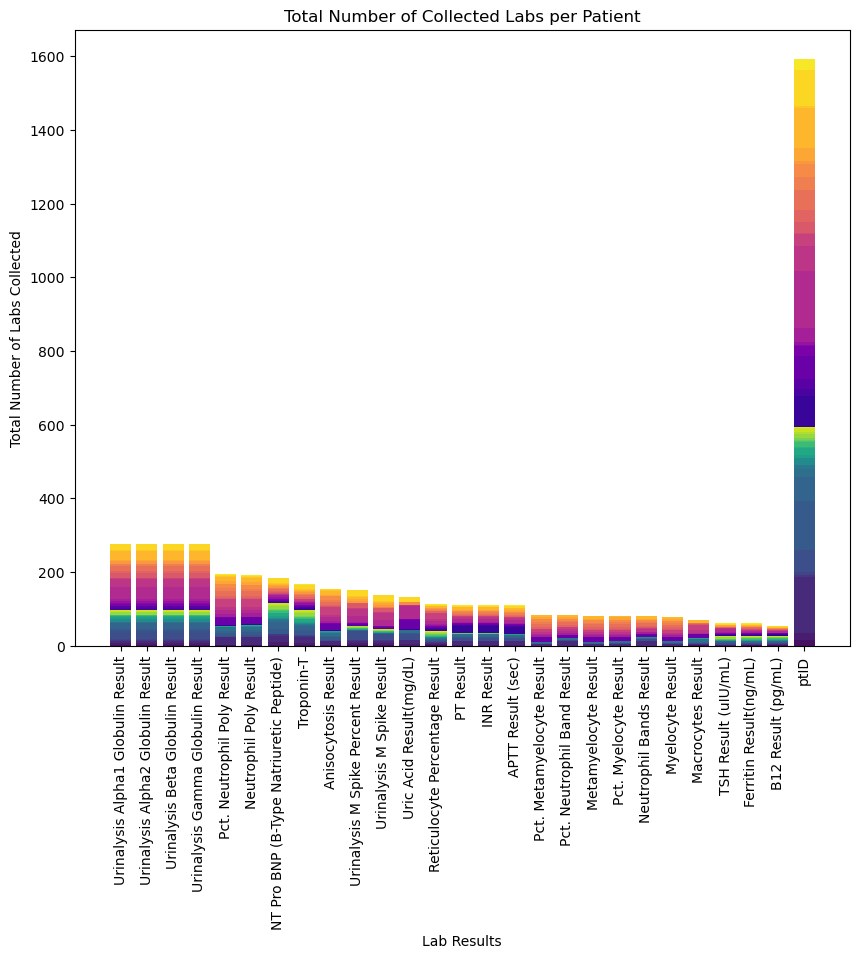

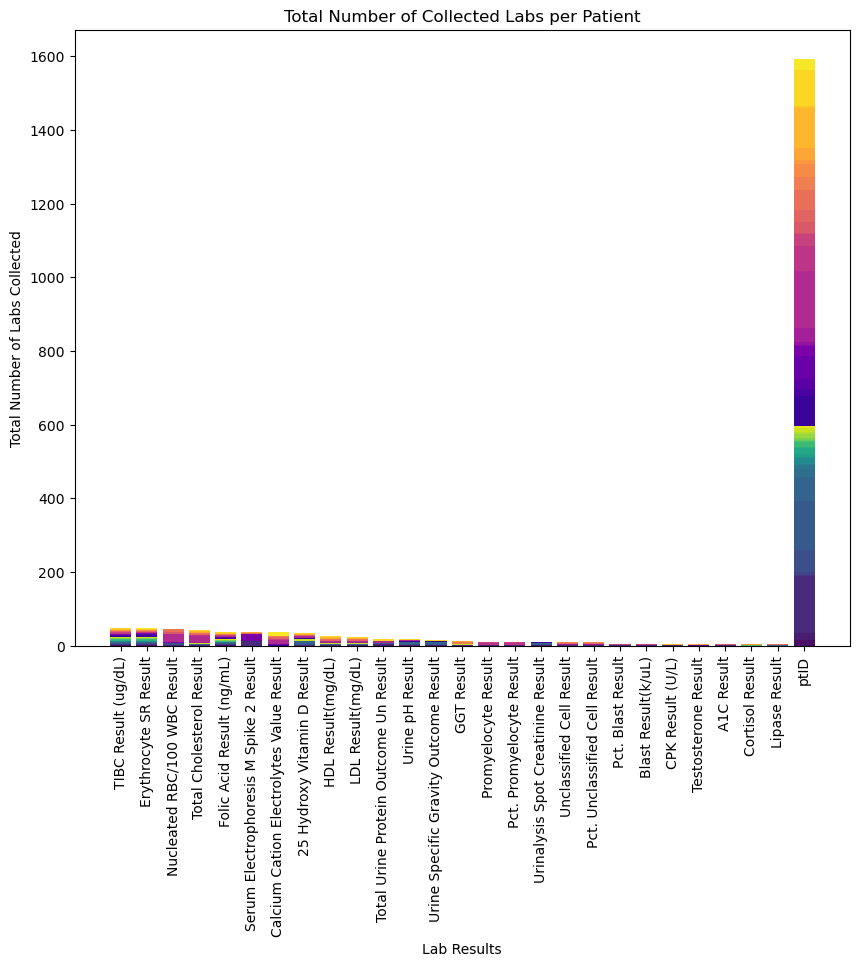

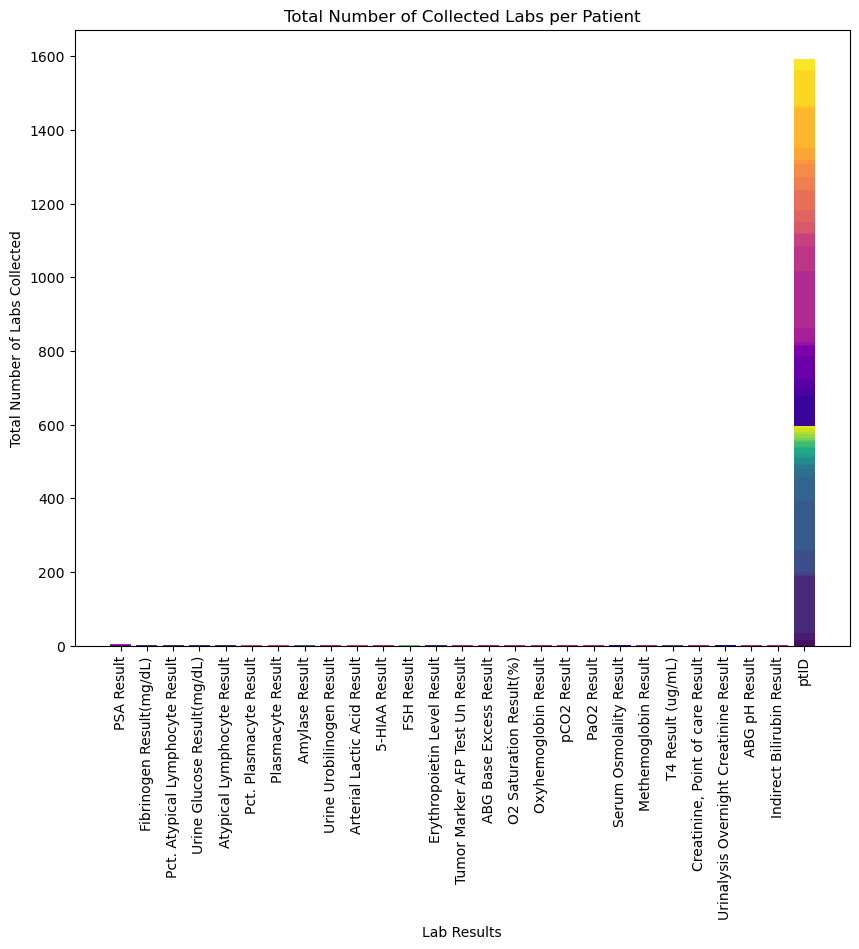

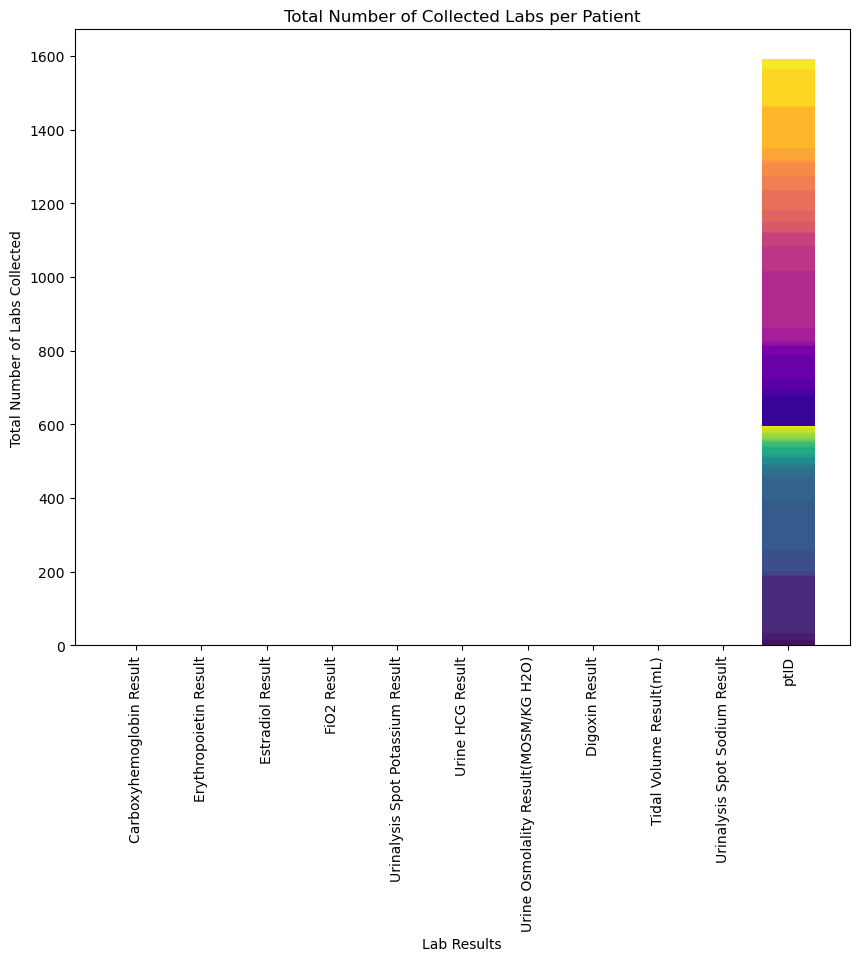

In [47]:
#create a stacked bar plot for the same data 
# Plot each row of data, coloring by patient and highlighting null values

# ax2 = plt.subplot2grid((1,2), (0,1))

for numb, slice in enumerate(slices_sorted):
    fig, ax2=plt.subplots(figsize=(10,8))
    listLabs = slice.copy()
    addCol = ['ptID']
    listLabs.extend(addCol)
    dataToPlot = df_allLabsFiltered[listLabs]

    bottom = np.zeros(len(listLabs))
    for ptID in unique_patients:
        #get patient section of frame
        ptDatatoPlot = patientSectionOfFrame(dataToPlot, column_toMask='ptID', ptID=ptID)
        ptDataToPlot_binary = createBinarySum(ptDatatoPlot, listLabs, x_column_name, defaxis = 0)
        color = patient_color_map[ptID]
        # df_ALStatus_labs_binarysums = df_ALStatus_labs_binarysums._append(ptDataToPlot_binary, ignore_index = True)
        p= ax2.bar(listLabs, ptDataToPlot_binary, width = 0.8, 
                label = listLabs, color = color,
                bottom = bottom)
        bottom = bottom + ptDataToPlot_binary


    # ax.set_xticks(ax.get_xticks)
    ax2.set_xticklabels(listLabs, rotation = 'vertical')

    ax2.set_xlabel('Lab Results')
    ax2.set_ylabel('Total Number of Labs Collected')
    # ax2.legend(handles=[plt.Line2D([0], [0], marker='o', color=palette[i], label=unique_patients[i], 
    #                               linestyle='') for i in range(num_patients)], loc='upper right',  
    #                               bbox_to_anchor=(1.15, 1))

    ax2.set_title("Total Number of Collected Labs per Patient")
    # plt.show()

    # figPathBar = outputFiguresPath(fileName_header="datafreq", fileName_mid=numb, fileName_suff= "barColor"+dateTag,
    #                             parent_dir=sub_dir, folderName=folderNameout)

    figPathBar = outputFiguresPath(fileName_header=fileNameHeader, fileName_mid="-barColor_" + str(numb) + "_", 
                                fileName_suff= fileNameSuffix, parent_dir=parent_dir, folderName=folder_data_out)
    
    plt.savefig(figPathBar, bbox_inches = 'tight')
    #save this output


## box plots

### all patients in the list first

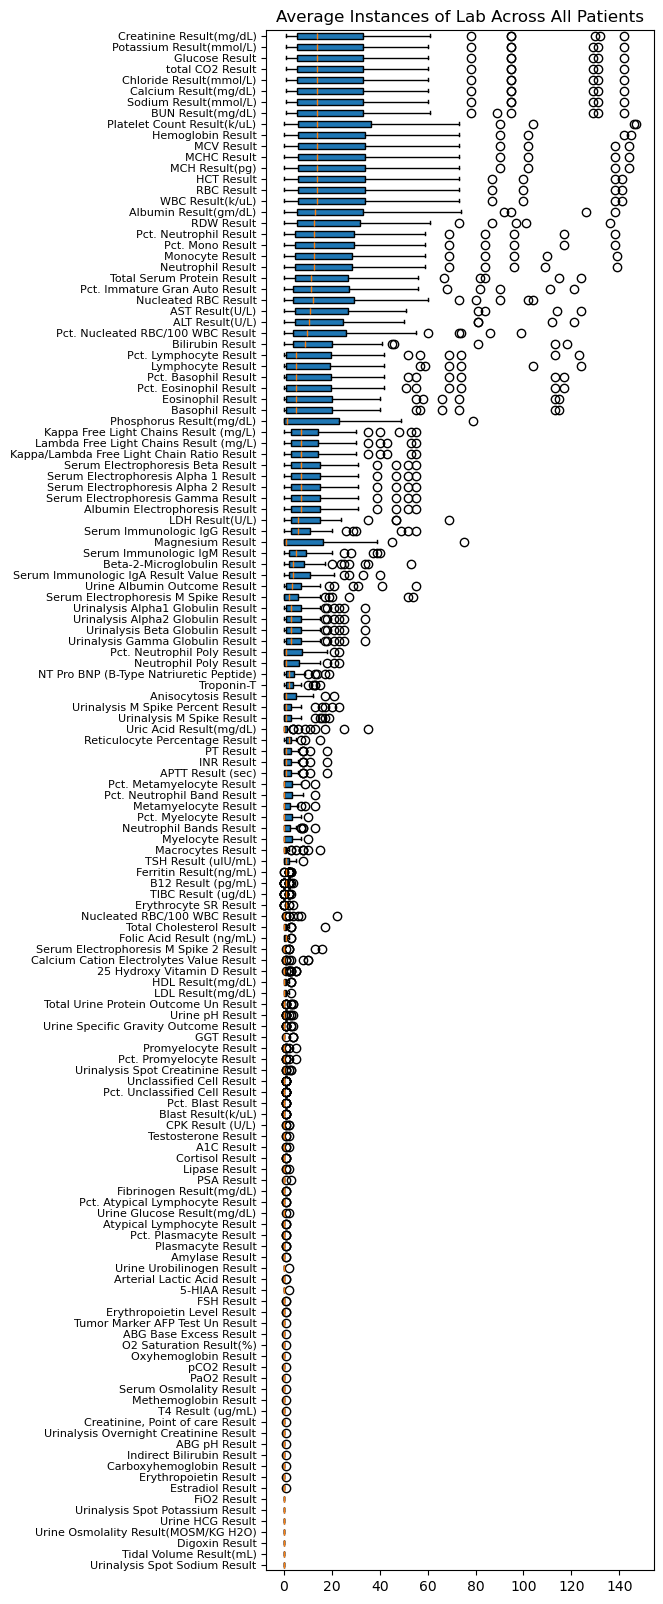

In [48]:
#vertical plot
dataToPlot = df_NumbLabsPerLabPerPt
fig, ax = plt.subplots(figsize = (5,20))
ax.boxplot(dataToPlot, patch_artist = True, vert= False)
ax.set_yticklabels(sorted_columnNames, rotation = 'horizontal', fontsize = 8)
ax.yaxis.set_inverted(True)
ax.set_title("Instances of Lab Across All Patients")

figPathBar = outputFiguresPath(fileName_header=fileNameHeader, fileName_mid="-boxAll_horiz_" , 
                            fileName_suff= fileNameSuffix, parent_dir=parent_dir, folderName=folder_data_out)

plt.savefig(figPathBar, bbox_inches = 'tight')

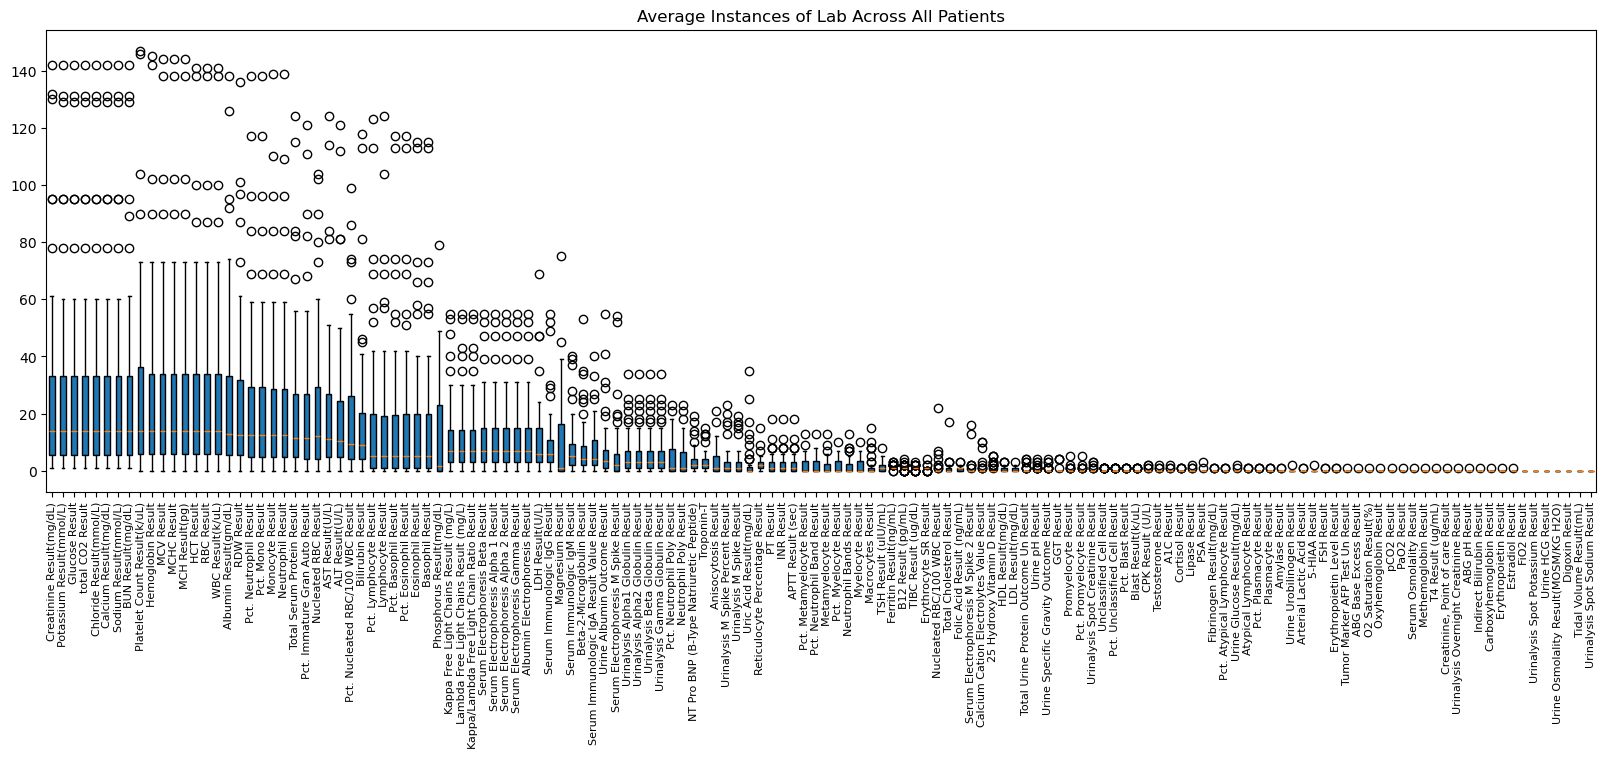

In [49]:
#horizontal plot
dataToPlot = df_NumbLabsPerLabPerPt
fig, ax = plt.subplots(figsize = (20,6))
ax.boxplot(dataToPlot, patch_artist = True)
ax.set_xticklabels(sorted_columnNames, rotation = 'vertical', fontsize = 8 )
ax.set_title("Instances of Lab Across All Patients")
# ax.yaxis.set_inverted(True)

figPathBar = outputFiguresPath(fileName_header=fileNameHeader, fileName_mid="-boxAll_vert_" , 
                            fileName_suff= fileNameSuffix, parent_dir=parent_dir, folderName=folder_data_out)

plt.savefig(figPathBar, bbox_inches = 'tight')

### by amyloid status

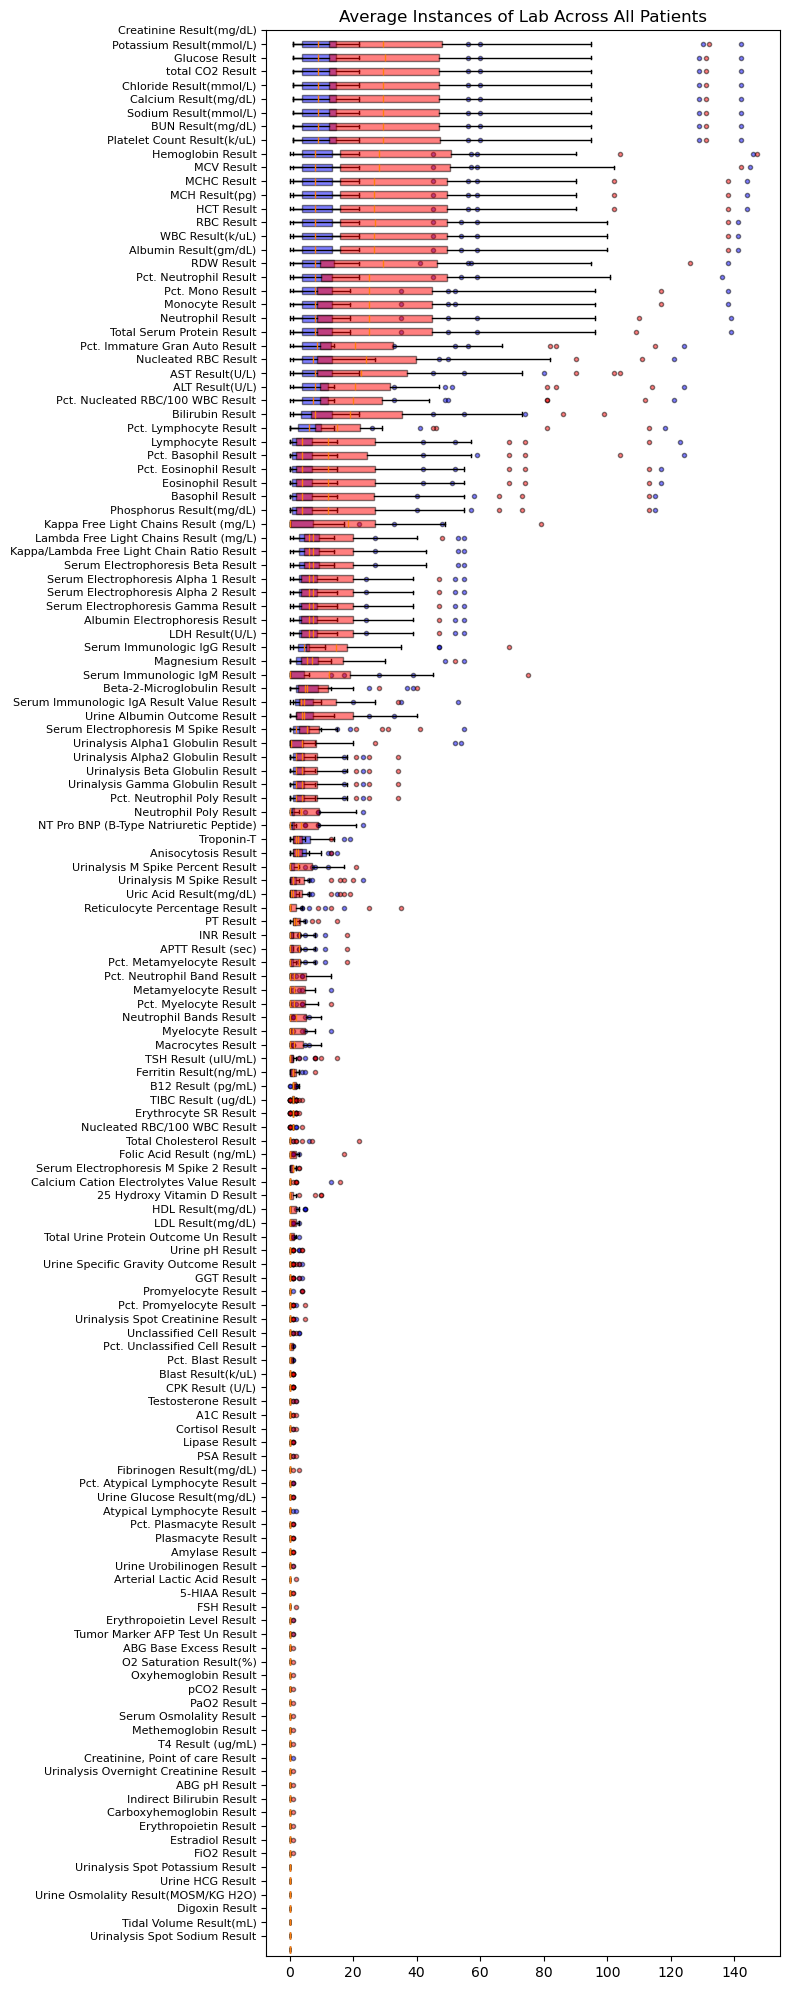

In [50]:
# by amyloid status
#horizontal box plot
dataToPlot_positive = df_NumbLabsPerLabPerPt.loc[listPositive]
dataToPlot_negative = df_NumbLabsPerLabPerPt.loc[listNegative]

boxToPlot_allPts = [dataToPlot_positive,dataToPlot_negative]

fig, ax = plt.subplots(figsize = (8,20))

# boxplot = ax.boxplot(boxToPlot_allPts, patch_artist = True)
boxplot = ax.boxplot(dataToPlot_positive, patch_artist = True, vert=False, boxprops={"facecolor" : 'blue', "alpha": 0.5},
                     flierprops = {"marker" : '.', "markersize" : 6, "markerfacecolor" :'blue', "alpha": 0.5})

boxplot = ax.boxplot(dataToPlot_negative, patch_artist = True, vert = False, boxprops={"facecolor" : 'red', "alpha": 0.5},
                     flierprops = {"marker" : '.', "markersize" : 6, "markerfacecolor" :'red', "alpha": 0.5})
# ax.set_xticklabels(sorted_columnNames, rotation = 'vertical', fontsize = 8 )
ax.set_yticks(np.arange(0,len(sorted_columnNames), step =1), sorted_columnNames, rotation = 'horizontal', fontsize = 8 )
ax.yaxis.set_inverted(True)
ax.set_title("Instances of Lab Across All Patients")
# ax.yaxis.set_inverted(True)

plt.tight_layout()

figPathBar = outputFiguresPath(fileName_header=fileNameHeader, fileName_mid="-boxALStat_horiz_" , 
                            fileName_suff= fileNameSuffix, parent_dir=parent_dir, folderName=folder_data_out)

plt.savefig(figPathBar, bbox_inches = 'tight')

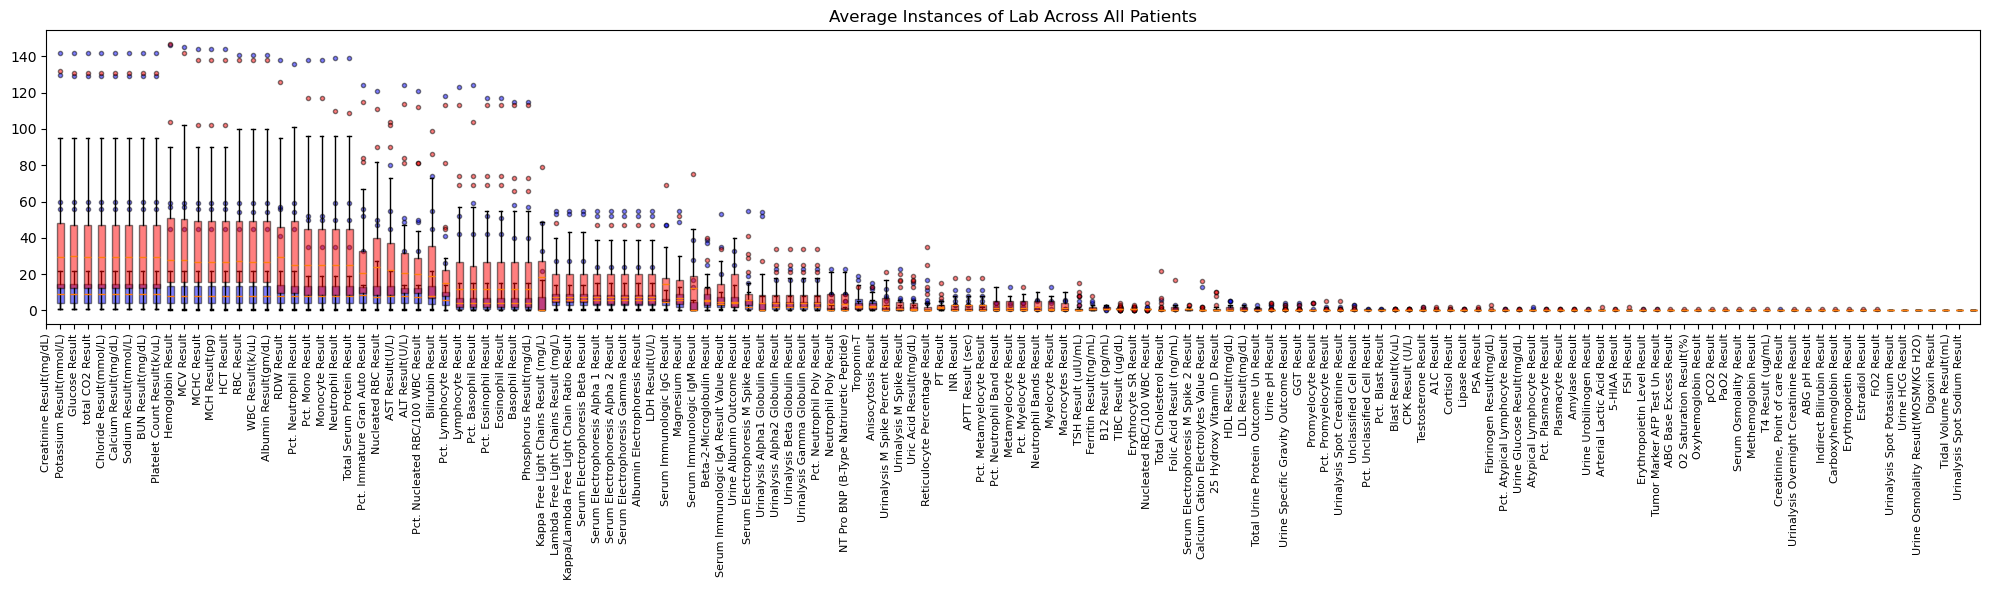

In [51]:
# by amyloid status
#vertical box plot
dataToPlot_positive = df_NumbLabsPerLabPerPt.loc[listPositive]
dataToPlot_negative = df_NumbLabsPerLabPerPt.loc[listNegative]

boxToPlot_allPts = [dataToPlot_positive,dataToPlot_negative]

fig, ax = plt.subplots(figsize = (20,6))

# boxplot = ax.boxplot(boxToPlot_allPts, patch_artist = True)
boxplot = ax.boxplot(dataToPlot_positive, patch_artist = True, boxprops={"facecolor" : 'blue', "alpha": 0.5},
                     flierprops = {"marker" : '.', "markersize" : 6, "markerfacecolor" :'blue', "alpha": 0.5})

boxplot = ax.boxplot(dataToPlot_negative, patch_artist = True, boxprops={"facecolor" : 'red', "alpha": 0.5},
                     flierprops = {"marker" : '.', "markersize" : 6, "markerfacecolor" :'red', "alpha": 0.5})
# ax.set_xticklabels(sorted_columnNames, rotation = 'vertical', fontsize = 8 )
ax.set_xticks(np.arange(0,len(sorted_columnNames), step =1), sorted_columnNames, rotation = 'vertical', fontsize = 8 )

ax.set_title("Instances of Lab Across All Patients")
# ax.yaxis.set_inverted(True)

plt.tight_layout()

figPathBar = outputFiguresPath(fileName_header=fileNameHeader, fileName_mid="-boxALStat_vert_" , 
                            fileName_suff= fileNameSuffix, parent_dir=parent_dir, folderName=folder_data_out)

plt.savefig(figPathBar, bbox_inches = 'tight')

# test

In [52]:
#combine both the number of labs the patient has
#and the number of time points they have into one dataframe
